In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Lesson 0 &ndash; Introduction

In this part, we will explore how to use machine learning skills to analyze text information.

## Learning Objectives
1. Preparing text data
    - reading a text file
    - retrieving abstracts from PubMed using PMID information
    - building a dataframe
2. Text data wrangling & processing
    - tokenization & lemmitization
    - stemming
    - stopword removal
3. Exploratory analysis of text data
    - word frequencies by uni-, bi-, and trigrams
    - frequency distribution
4. Parts of Speech Tagging
    - understanding language syntax and structure
    - shallow parsing or chunking
    - constituency parsing
    - dependency parsing
    - named entity recognition
5. Feature representation
    - bag-of-words 
    - TF-IDF
6. Predictive analysis of text data
    - logistic regression
    - naive Bayes

## Description of Dataset
The data is a publicly available, annotated dataset that was previously curated manually by systematic reviewers.  
*Sources: Cohen AM et al. Reducing Workload in Systematic Review Preparation Using Automated Citation Classification.* JAMIA *2006;13(2):206-219. Downloaded from https://dmice.ohsu.edu/cohenaa/systematic-drug-class-review-data.html on March 26, 2020*

Systematic review decisions for abstracts and articles are included for these fifteen drug review topics:  
- ACE inhibitors (ACEIs)  
- Attention-deficit hyperactivity disorder (ADHD)  
- Antihistamines
- Atypical antipsychotics  
- Beta blockers (BBs)
- Calcium challen blockers (CCBs)  
- Estrogens  
- NSAIDS  
- Opioids  
- Oral hypoglycemics (OHGs)  
- Proton pump inhibitors (PPIs)
- Skeletal muscle relaxants  
- Statins  
- Triptans  
- Urinary incontinence  

The data file has five columns: topics, EndNote ID, PubMed ID (PMID), abstract triage status, and article Triage Status.  
Due to the computational capacity of a Python library module we will later use, I cut the data down to hold only 10,000 artles, to include the first nine topics (ACEIs to Opioids) only.

The original file is in tab-separated value (.tsv) format. We can convert it into txt file using Excel.

The converted txt file looks like this. (I converted the tsv file to txt file for you.)
  
  
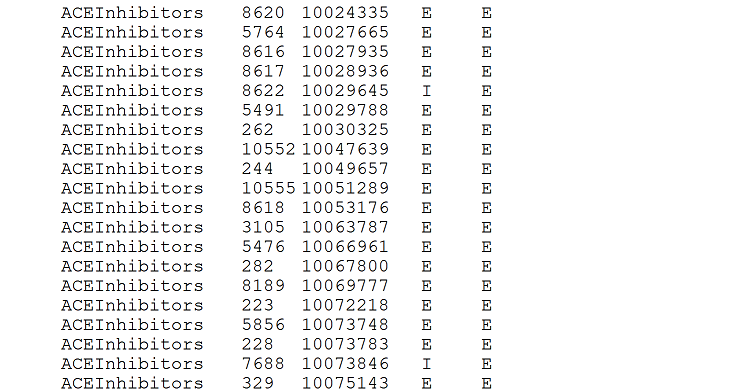

### Warning!!!
<font color=red>Your work will not be saved in Jupyter Notebook. You should download your work after working on it. <font>

In [1]:
import os

os.getcwd()
path='\\Users\\silve\OneDrive\\UNC\\Mostafa\\ENABLE\\SR dataset'
os.chdir(path)

# Lesson 1 &ndash; Data Preprocessing

We are interested in extracting topics, PMID, and exclusion/inclusion decision, which correspond to the first, third, and fourth column of the txt file.  
  
Take a close look at each line. Each line begins with topics which are strings, followed by a tab, then EndNote IDs which are integers. Again a tab followed by PMIDs, which are integers, and then come abstract triage decisions and full-article triage decisions which are represented by single upper-case characters, separated by a tab. We can express each line in a *pythonic way* as below:  
  
`"topics" + "\t" + "EndNote ID" + "\t" + "PMID" + "\t" + "abstract triage decision" + "\t" + "full-article triage decision"`  
  
First, read the file line by line  
Each line in the file has five elements deliminated by tabs.

We will extract topics (1st element), PMIDs (3rd element), and abstract triage decisions (4th element).  
  
We will make a dictionary 'data', whose keys are topics and whose values are (PMID, triage decision) tuples, to construct the information we have retrieved.

In [2]:
file = open('epc-ir_clean_10k.txt')

data = {}

for line in file:
    line = line.strip()
    line_elements = line.split('\t') # split a line into five elements.
    topic = line_elements[0] # 'Topic' is the first element in each line.
    pmid = line_elements[2] # 'PMID' is the third element in each line.
    decision = line_elements[3] # 'abstract triage decision' is the fourth element in each line
    values = pmid,decision # values are the tuples whose elements are pmid and decision.
    data.setdefault(topic,{}).setdefault(pmid,decision) # see below

print(data)

file.close()

{'ACEInhibitors': {'10024335': 'E', '10027665': 'E', '10027935': 'E', '10028936': 'E', '10029645': 'I', '10029788': 'E', '10030325': 'E', '10047639': 'E', '10049657': 'E', '10051289': 'E', '10053176': 'E', '10063787': 'E', '10066961': 'E', '10067800': 'E', '10069777': 'E', '10072218': 'E', '10073748': 'E', '10073783': 'E', '10073846': 'I', '10075143': 'E', '10075388': 'E', '10077374': 'E', '10078088': 'I', '10080414': 'E', '10080455': 'E', '10080457': 'I', '10082500': 'E', '10083055': 'E', '10086852': 'E', '10088066': 'I', '10089936': 'E', '10090111': 'E', '10090348': 'E', '10090351': 'E', '10091486': 'E', '10091816': 'E', '10091821': 'E', '10093076': 'E', '10093769': 'E', '10095796': 'E', '10097934': 'E', '10099033': 'E', '10099034': 'E', '10099064': 'E', '10099075': 'E', '10099910': 'I', '10100063': 'E', '10100064': 'E', '10100068': 'E', '10100083': 'E', '10100105': 'E', '10130617': 'E', '10150320': 'E', '10150325': 'E', '10155301': 'E', '10164060': 'E', '10169388': 'E', '10170450': 

`setdefault()` function returns value if the key is in the dictionary; if not, inserts key with the value of default and returns default.  
In our code `data.setdefault(pmid,[]).append((topic,decision))`, `setdefault()` function  keeps appending values if their keys are already there in the 'data' dictionary. When faced with a new key, the function creates a new empty dictionary that is ready to receive a new list which is comprised of tuples ('topic','decision')  
  
As you can see, the article '10024335' was used for two reviews, "ACEInbihitors" and "Statins." `setdefault()` is such a powerful tool to retrieve duplicated record that it does not allow to lose information used in different domains.  
  
Now we have a data dictionary whose keys are PMIDs and values are tuples of topics and trage decisions.    
With this dictionary, we can easily navigate topics with PMIDs at hand.  

Next, we want to build a Python DataFrame that will have columns of topic, PMID, triage decisions, and abstract text. 

In order to use Python's DataFrame, we first have to import `pandas` library.

In [3]:
import pandas as pd
from pandas import DataFrame

The index of the DataFrame should be PMIDs. First, we will create an empty DataFrame with three columns--topic, PMID, and triage decision.  

In [4]:
col_names = ['topic','pmid','decision']
df = pd.DataFrame(columns = col_names)
df.head() # df is an empty DataFrame with three columns

,topic,pmid,decision


To add values to the empty 'df,' use `pandas.DataFrame.append()`. Construct the Pandas Series object using a dictionary that maps a column to a value and the name of the row to add.

In [5]:
# iterate over every topic, i.e., 'ACEInhitors',...,'Opioids'
for topic in data: 
    
    # extract the dictionary contained in each topic, i.e., {'10024335': 'E', '10027665': 'E',...}
    dict_by_topic = data[topic] 
    
    #  iterate over PMIDs (keys) in the sub-dictionary, i.e.,., '10024335'...
    for pmid in dict_by_topic: 
        
        # make a new dictionary with respect to the PMID. 
        # This data will become rows that will be inserted into the empty df.
        value = {'topic':topic, 'pmid':pmid, 'decision':dict_by_topic[pmid]} 
        
        # transform the 'value' dictionary to Pandas series.
        row = pd.Series(value)
        
        # append the series to the empty df.
        df = df.append(row, ignore_index=True)

In [7]:
df.head(10)

,topic,pmid,decision
0,ACEInhibitors,10024335,E
1,ACEInhibitors,10027665,E
2,ACEInhibitors,10027935,E
3,ACEInhibitors,10028936,E
4,ACEInhibitors,10029645,I
5,ACEInhibitors,10029788,E
6,ACEInhibitors,10030325,E
7,ACEInhibitors,10047639,E
8,ACEInhibitors,10049657,E
9,ACEInhibitors,10051289,E


Now, We will add a new column, 'abstract,' to contain the texts of abstracts.    
To to this, we have to retrieve PubMed abstracts using the BioPython library.

------
## Getting abstracts from a list of PMID

credit: https://stackoverflow.com/questions/47559098/is-there-any-way-to-get-abstracts-for-a-given-list-of-pubmed-ids

#### BioPython library
Using BioPython library, you can extract the abstracts of given PMID. You can give the joined list of Pubmed IDs to Entrez.efetch that will perform a single URL lookup, creating the **dictionaries** whose keys are PMID and values are abstract strings. 

If this is the first time you use BioPython library, you have to install the module with the following code. You do not have to install BioPython if you had already installed it before.

In [8]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


Then import Entrez from the Bio library.

In [8]:
from Bio import Entrez

To make use of Entrez, we first have to have a list of PMIDs. 

In [9]:
# make an empty list that will hold PMIDs
pmids_list = []

# iterate over the key of the 'data' dictionary (i.e., topics) we built before.
for topic in data:
    
    # iterate over the PMIDs that are contained in the 'topics' sub-dictionaries.
    for pmid in data[topic]:
        
        # The PMIDs in the 'data' dictionaries are strings. 
        # To get PMIDs read by the Entrez module, we have to transform PMIDs into integers.
        pmid = int(pmid)
        
        # append any new PMIDs to 'pmids_list'
        if pmid not in pmids_list:
            pmids_list.append(pmid)

Check the number of PMIDs.

In [12]:
len(pmids_list)

8914

There are 8914 unique PMIDs in the data.  
  
Now, we have a list of PMIDs, 'pmids_list.' We will pass the 'pmids_list' to Entrez module.  
(The following code will require a couple of minutes to complete running)

In [10]:
abstract_dict = {}
without_abstract = []

handle = Entrez.efetch(db="pubmed", id=','.join(map(str, pmids_list)),
                       rettype="xml", retmode="text")
records = Entrez.read(handle)

for pubmed_article in records['PubmedArticle']:
    pmid = int(str(pubmed_article['MedlineCitation']['PMID']))
    article = pubmed_article['MedlineCitation']['Article']
    if 'Abstract' in article:
        abstract = article['Abstract']['AbstractText'][0]
        abstract_dict[pmid] = abstract
    else:
       without_abstract.append(pmid)

C:\Users\silve\Anaconda3\lib\site-packages\Bio\Entrez\__init__.py:631: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  UserWarning,


The keys of the 'abstract_dict' dictionary are PMIDs, and the values are the text of abstracts corresponding to each PMID. Take a look at the abstract text of the PMID 8041685.

In [11]:
abstract_dict[8041685]

'Diagnosis of myofascial pain syndrome may become less challenging as clinical criteria become better defined. The mechanisms are not well known, and the syndrome occurs in a wide variety of settings. Trigger points with referred pain are the most common feature. Treatment consists of physical modalities (spray-and-stretch techniques and trigger point block) combined with a program of graded muscle stretching and strengthening. Early, aggressive treatment yields an improved prognosis.'

Now, we will attach the abstract texts to a new column of our DataFrame 'df.'  

In [12]:
# make an empty column that will contain the texts of abstracts. 
# The columns is a Pandas series.
abstract_col = pd.Series([])

# In the df data frame we made before, we will iterate over PMIDs in the df one by one.
for i in range(len(df)):
    
    # We will extract PMIDs which are located in the second column of df.
    pmid = df.iloc[i,1]
    
    # Currently the PMIDs are in string form. Transform them into integers.
    pmid = int(pmid)
    
    # There are some articles whose abstracts are not provided in PubMed. 
    # In that case, we will fill in 'NaN' in the abstract text column.
    if pmid in abstract_dict:
        abstract_col[i]=abstract_dict[pmid]
    else:
        abstract_col[i]='NaN'
        

Make sure all 10,000 articles has their abstract articles.

In [13]:
len(abstract_col)

10000

Attach 'abstract_col,' a pandas Series, to DataFrame 'df.'

In [14]:
df.insert(3, "abstract", abstract_col)

Now, we have a complete dataset that contain the information about topics, PMIDs, abstracts, and triage decisions.

In [15]:
df.head(20)

,topic,pmid,decision,abstract
0,ACEInhibitors,10024335,E,Hypercholesterolemia and hypertension are freq...
1,ACEInhibitors,10027665,E,To implement and measure the effects of automa...
2,ACEInhibitors,10027935,E,In patients with insulin-dependent diabetes me...
3,ACEInhibitors,10028936,E,Aortic root flow and pressure estimates were o...
4,ACEInhibitors,10029645,I,Population-based studies have found that black...
5,ACEInhibitors,10029788,E,"Exfoliative dermatitis, also known as erythrod..."
6,ACEInhibitors,10030325,E,Angiotensin-converting-enzyme (ACE) inhibitors...
7,ACEInhibitors,10047639,E,We investigated the effects of a short-acting ...
8,ACEInhibitors,10049657,E,Outpatients with essential hypertension were r...
9,ACEInhibitors,10051289,E,Incomplete suppression of the renin-angiotensi...


As you may notice, the PMID 10069777 article does not have its abstract text. To certify this, visit pubmed.gov and search the article using the query '10069777[pmid]'  
  
  
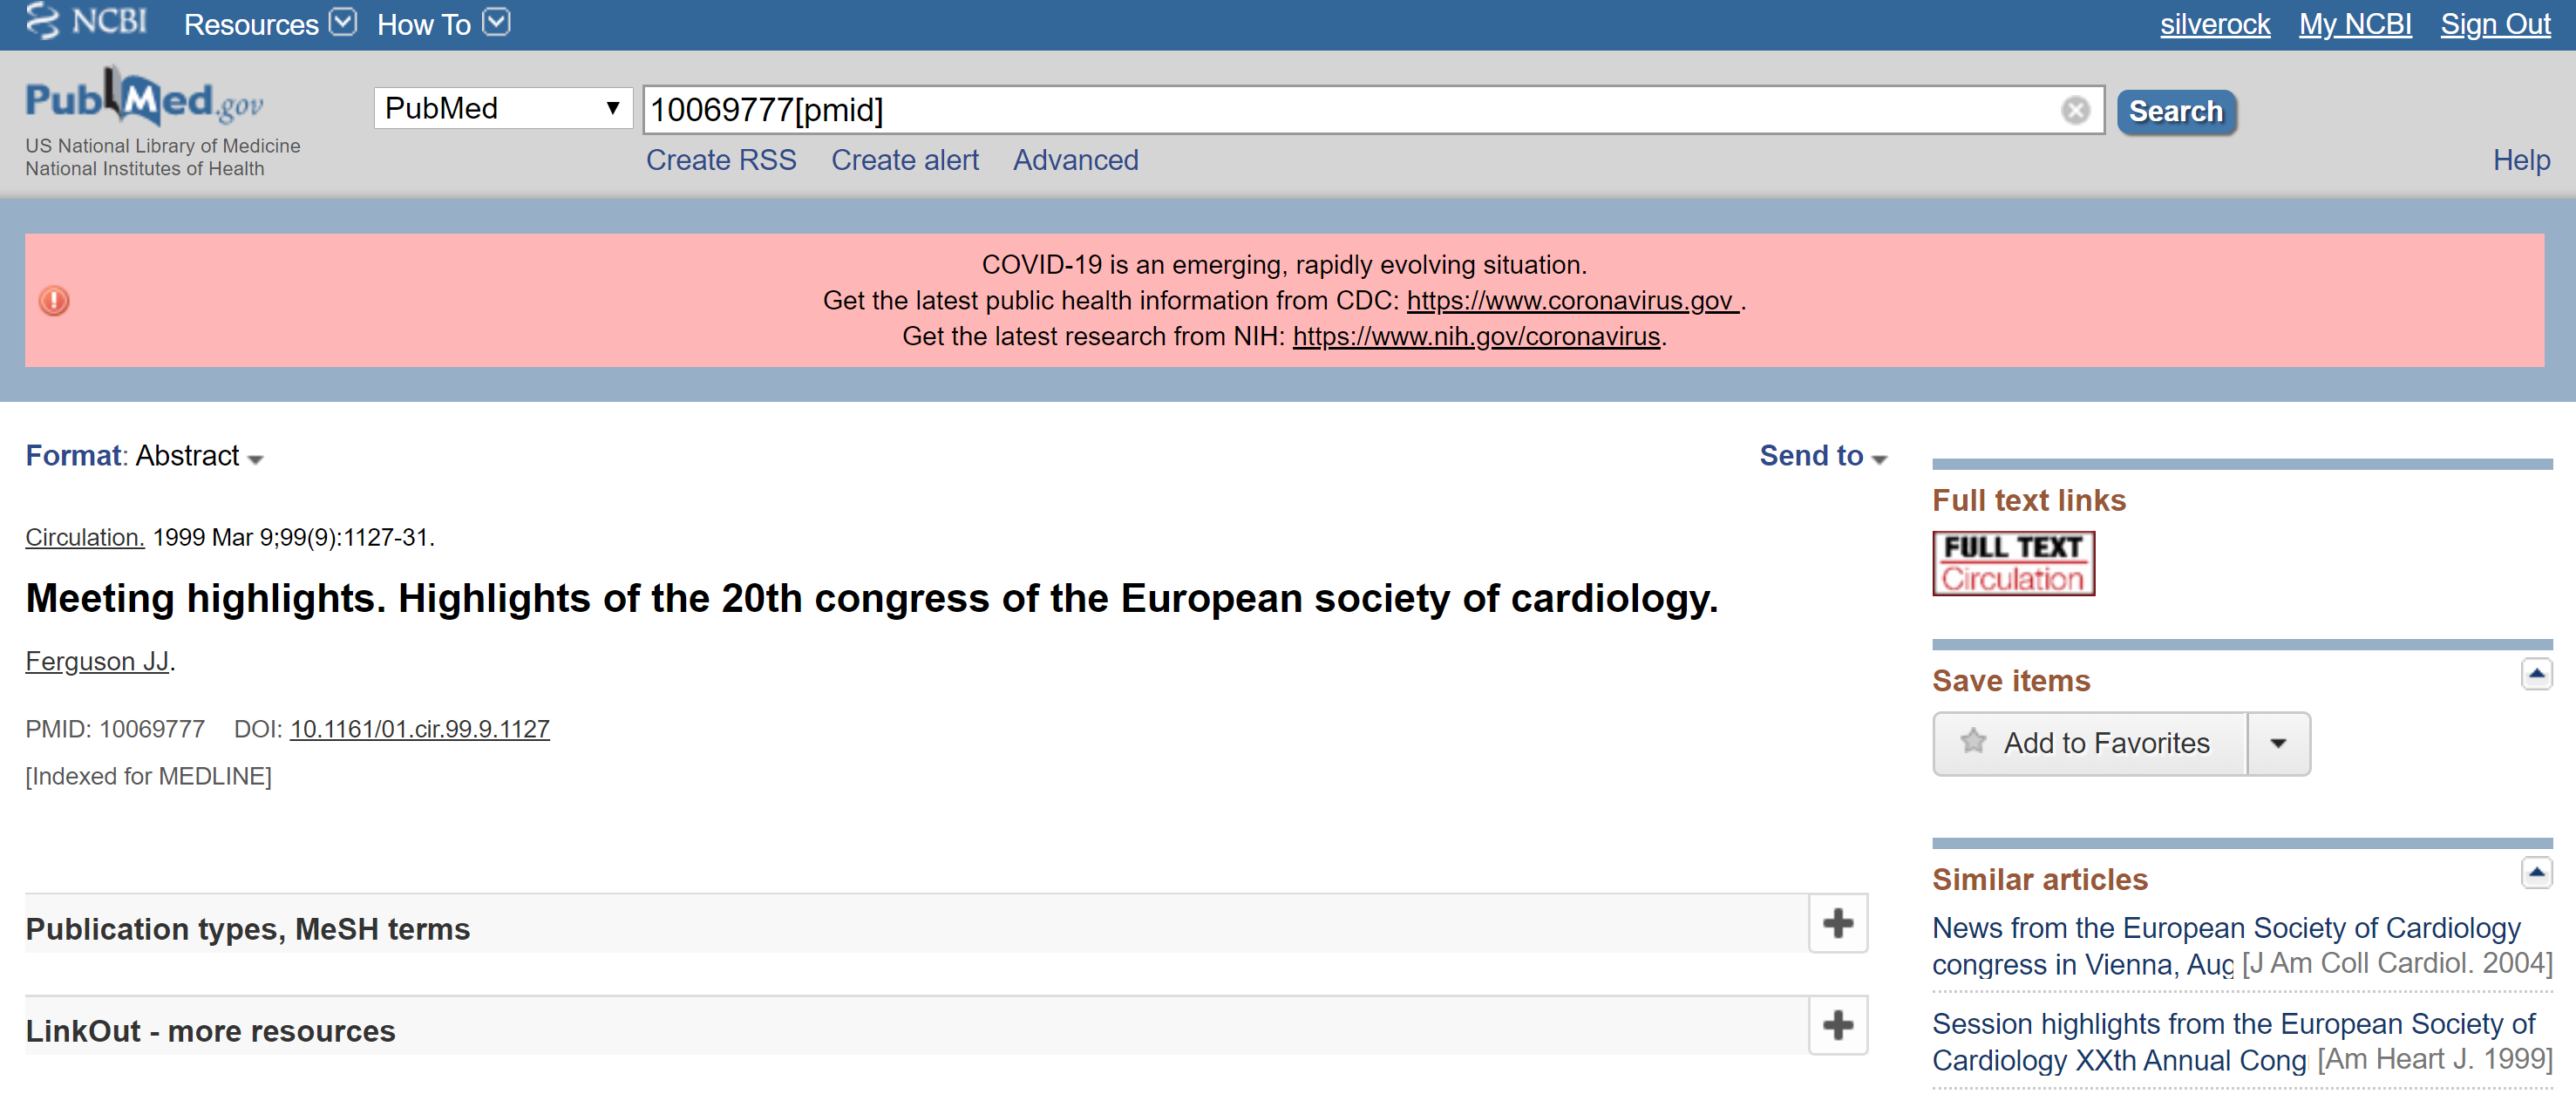

## Navigating DataFrame

You can locate rows and columns with specific values using a `loc` command.  
Let's find a row corresponding to the PMID 8041685

In [16]:
df.loc[df['pmid']=='8041685']

,topic,pmid,decision,abstract
9999,Opiods,8041685,E,Diagnosis of myofascial pain syndrome may beco...


We can find rows whose topic is 'BetaBlockers' and triage decision is 'include' but their abstract information is not available.  

In [17]:
df.loc[(df['topic']=='BetaBlockers') & (df['decision']=='I') & (df['abstract']=='NaN')]

,topic,pmid,decision,abstract
4825,BetaBlockers,10023937,I,NaN
4836,BetaBlockers,10030320,I,NaN
4841,BetaBlockers,10073788,I,NaN
4888,BetaBlockers,10229240,I,NaN
4912,BetaBlockers,10376609,I,NaN
5050,BetaBlockers,10735475,I,NaN
5106,BetaBlockers,10856401,I,NaN
5124,BetaBlockers,10896486,I,NaN
5151,BetaBlockers,10938495,I,NaN
5176,BetaBlockers,10981092,I,NaN



When you take a close look at the data, you will notice that there are some articles whose 'decision' codes are integers

In [18]:
df.loc[(df['topic']=='BetaBlockers') & (df['decision']=='5')].head()

,topic,pmid,decision,abstract
4953,BetaBlockers,10466460,5,The aim of this study was to determine whether...
5019,BetaBlockers,10666349,5,NaN
5066,BetaBlockers,10760544,5,The variability in the individual response to ...
5068,BetaBlockers,10776828,5,For some time the medical treatment of glaucom...
5096,BetaBlockers,10839554,5,The recommendation for first-line therapy for ...


According to the description of dataset (https://dmice.ohsu.edu/cohenaa/systematic-drug-class-review-data.html), the integer codes indicate reasons for exclusion. Therefore, we can categorize those integer codes to 'E' in the 'decision' column.  
  
`replace(self,to_replace)` function replaces `self` values with `to_replace` values in a DataFrame.

In [19]:
df['decision'] = df['decision'].replace(['1','2','3','4','5','6','7','8','9'],'E')

df.head()

,topic,pmid,decision,abstract
0,ACEInhibitors,10024335,E,Hypercholesterolemia and hypertension are freq...
1,ACEInhibitors,10027665,E,To implement and measure the effects of automa...
2,ACEInhibitors,10027935,E,In patients with insulin-dependent diabetes me...
3,ACEInhibitors,10028936,E,Aortic root flow and pressure estimates were o...
4,ACEInhibitors,10029645,I,Population-based studies have found that black...


We, now, have a neatly formatted dataset of articles, and you can quickly check the total number of  articles with the following code.

In [20]:
df.topic.value_counts()

ACEInhibitors             2544
BetaBlockers              2072
CalciumChannelBlockers    1218
Opiods                    1124
AtypicalAntipsychotics    1120
ADHD                       851
NSAIDS                     393
Estrogens                  368
Antihistamines             310
Name: topic, dtype: int64

# Lesson 2 &ndash; Text Data Preprocessing

Credit: https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

### To play the lecture video, run the cell below.
<font color=blue>We will use this video for submitting your answers to in-class quiz and exercises.<font>

In [21]:
from IPython.display import HTML

HTML('<iframe width="800" height="560" src="https://edpuzzle.com/embed/media/5ec0addd917ba83efc3920b4" frameborder="0" allowfullscreen></iframe>')

C:\Users\silve\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Now that we have created data sets that have texts and the topics, we need to preprocess our text data before we convert it to something useful (i.e. numbers) for the machine learning model.  

**Note**: You don't need to learn about all the details about the codes written here. You can just use the codes in the this Lesson for future references

The raw texts in the 'abstract' column need to be cleaned to represent each word in the text correctly. 

To to this, first download and install Natural Language Toolkit (NLTK).  
NLTK is a commonly used tool in Python to conduct the text analysis. It is an open source library in Python, and has support for most NLP tasks. It also provides access to numerous text corpora.  
  
To install nltk, a `pip install nltk` or a `conda install nltk` should suffice.

In [24]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


And then import the 'nltk' library.

In [22]:
import nltk

--------------
## Removing Special Characters

Special characters and symbols are usually non-alphanumeric characters or even occasionally numeric characters (depending on the problem), which add to the extra noise in unstructured text. Usually, simple regular expressions (regexes) can be used to remove them.  
  
We need to import 're' module in order to use regexes.

In [23]:
import re

In [24]:
def remove_special_characters(text, remove_digits=False):
    '''
    A caret located in a bracket means ‘not.’ 
    If remove_digits parameter is True, "^a-zA-Z0-9\s" matches any characters other than 
    alphabets ([a-zA-Z]) or digits ([0-9]), followed by a white space ([\s]).
    If 'remove_digits' parameter is False, the the function will remove numbers as well. 
    '''
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [25]:
remove_special_characters("Well this was fun! What do you think? 123#@", 
                          remove_digits=True)

'Well this was fun What do you think '

As you can see here, the 'remove_special_characters' function removed the exclamation mark, question marks. Then why did it remove 123 here? It is because we turned on the 'remove_digits' parameter. The definition of the 'remove_special_characters' says that if the 'remove_digits' parameter is turned on, it matches non-alphabetical characters (i.e., numbers) and removes them.  
  
So if we turn off the "remove_digits" parameter, which is default, we can see digits are survived.

In [26]:
remove_special_characters("Well this was fun! What do you think? 123#@", 
                          remove_digits=False)

'Well this was fun What do you think 123'

-------------
## Removing Stop Words

Words which have little or no significance, especially when constructing meaningful features from text, are known as stopwords or stop words. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Typically, these can be articles, conjunctions, prepositions and so on. Some examples of stop words are ***a, an, the, and*** the like.  
  
There is no universal stop word list, but we will use a standard English language stopwords list from nltk.

In [27]:
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

Let's look at the list of stop words from nltk.

In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Note that NLTK's stopword list contains contractions like "you'll," as well as negative expressions like "not" and "hasn't."  
  
In the current analysis, we will not remove negative expressions like 'no' and 'not' from original texts because they provide us important meaning of the text.  
When the 'is_lower_case' parameter is **True**, the 'remove_stopwords' function does not remove stopwords if any of their characters are in uppercase.

In [38]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no') # we will not remove 'no' from texts
stopword_list.remove('not') # we will not reomve 'not' from texts

In [39]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [40]:
remove_stopwords("The, and, if are StopWords, computer is not")

', , StopWords , computer not'

In [41]:
remove_stopwords("The, and, if are StopWords, computer is not", is_lower_case=True)

'The , , StopWords , computer not'

# Exercise

Consider a few product reviews that are already annotated:  
  
1. The product is really very good. – POSITIVE  
2. The product seems to be good. – POSITIVE  
3. Good product. I really liked it. – POSITIVE  
4. The product is not good. – NEGATIVE  
5. I didn’t like the product. – NEGATIVE  
  
Remove stop words in each review using the codes provided above and look what happens to the review comments. Critically argue whether stop words removal improves model performance in any context. Submit your codes to the text box embeded in the lecture video.

--------------
## Stemming

### To play the lecture video, run the cell below.
<font color=blue>We will use this video for submitting your answers to in-class quiz and exercises.<font>

In [19]:
from IPython.display import HTML

HTML('<iframe width="800" height="560" src="https://edpuzzle.com/embed/media/5ec0aeb22f4e7c3f03a29d60" frameborder="0" allowfullscreen></iframe>')

Word stems are also known as the base form of a word, and we can create new words by attaching affixes to them in a process known as inflection. The goal of stemming is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. Stemming process maps all inflectional forms of a word to the same root form. Consider the word ***compute***. You can add affixes to it and form new words like ***computes, computed***, and ***computing***. In this case, the base word ***comput*** is the word stem.  
  
  
The reverse process of obtaining the base form of a word from its inflected form is known as **stemming**. Stemming helps us in standardizing words to their base or root stem, irrespective of their inflections, which helps many applications like classifying or clustering text, and even in information retrieval.  
  
Let’s see the popular Porter stemmer in action now.  
Porter stemmer, or Porter's algorithm, is a rule-based suffix stripping algorithm. For example, the word ***duplicatable*** is stemmed by the following steps:
1. ***duplicatable*** to ***duplicat*** by a rule from step 4.
2. ***duplicat*** to ***duplicate*** by a rule from step 1b1.
3. ***duplicate*** to ***duplic*** by a rule from step 3.
4. [Stop]  
  
Porter stemmer is known for its simplicity and speed.  

In [29]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    # split the text into individual word and return a list of words
    # the 'ps' function stems each word, and .join() function joins the stemmed words with whitespace.
    text = ' '.join([ps.stem(word) for word in text.split()]) 
    return text

In [30]:
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

---------------
## Lemmatization

Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However, the base form in lemmatization is known as the root word, but not the root stem. The difference being that the root word is always a lexicographically correct word (present in the dictionary), but the root stem may not be so. Thus, root word, also known as the lemma, will always be present in the dictionary.  
For example, “am, are, is” will be lemmatized into “be”; “car, car’s, cars’, cars” into “car”. After the process of lemmatization, the importance of some specific words will be enhanced.  

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    s = " " # create an empty string that later will contain lemmatized words,
    t_l = [] # create an empty list
    t_w = nltk.word_tokenize(text) # tokenize the text
    # assign the list of tokenized words into t_w.
    for w in t_w:
        # “pos” is a part of speech parameter and “v” means verbs. 
        # We will lemmatize verbs only. 
        l_w = wordnet_lemmatizer.lemmatize(w, pos="v")
        # append l_w into the list t_l
        t_l.append(l_w)
    # joint the tokens to make a complete sentence
    text = s.join(t_l)
    return text

In [33]:
lemmatize_text("My system keeps crashing! his was crashed yesterday, ours crashes daily")

'My system keep crash ! his be crash yesterday , ours crash daily'

---------------
## Building a Text Normalizer

Let’s now bring everything we learnt together and chain these operations to build a text normalizer to pre-process text data.

In [42]:
def normalize_corpus(corpus, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

Not let's put this function in action!. We will create a new column 'clean_abs' to hold pre-processed text of abstract.

In [44]:
df['clean_abs'] = normalize_corpus(df['abstract'])
norm_corpus = list(df['clean_abs'])

In [45]:
df.head()

,topic,pmid,decision,abstract,clean_abs
0,ACEInhibitors,10024335,E,Hypercholesterolemia and hypertension are freq...,hypercholesterolemia hypertension frequently a...
1,ACEInhibitors,10027665,E,To implement and measure the effects of automa...,implement measure effect automatic computerize...
2,ACEInhibitors,10027935,E,In patients with insulin-dependent diabetes me...,patients insulindependent diabetes mellitus id...
3,ACEInhibitors,10028936,E,Aortic root flow and pressure estimates were o...,aortic root flow pressure estimate obtain noni...
4,ACEInhibitors,10029645,I,Population-based studies have found that black...,populationbased study find black patients cong...


In the 'clean_abs' column, all the text is in lowercase and there are also no punctuation marks, no stopwords, and no contractions. Our text cleaning has worked like a charm.  

Let's take a look at the first row of 'abstract' and 'clean_abs' columns and transform them in a dictionary form.

In [46]:
# to_dict() function transforms row dataframe into a dictionary
df.iloc[0][['abstract','clean_abs']].to_dict()

{'abstract': 'Hypercholesterolemia and hypertension are frequently associated with elevated sympathetic activity. Both are independent cardiovascular risk factors and both affect endothelium-mediated vasodilation. To identify the effects of cholesterol-lowering and antihypertensive treatments on vascular reactivity and vasodilative capacity, we studied 30 hypercholesterolemic hypertensive subjects. They received placebo for 4 weeks, either enalapril or simvastatin for 14 weeks, and, finally, both medications for an additional 14 weeks. Postischemic forearm blood flow (MFBF) and minimal vascular resistance (mFVR) were used as indices of vasodilative capacity and structural vascular damage, respectively. Total (resting-stress-recovery phases) cardiovascular (blood pressure [BP] and heart rate [HR]) and regional hemodynamic (FBF and FVR) reactivity to stressful stimuli were calculated as area-under-the-curve (auc) (valuextime). Compared with baseline levels, simvastatin reduced total (TOT

In [47]:
df.iloc[5679][['abstract','clean_abs']].to_dict()

{'abstract': StringElement('Hydralazine and isosorbide dinitrate combination (H+ISDN), angiotensin-converting enzyme inhibitors, and beta-blockers have improved outcomes in heart failure (HF). Analysis of previous trials has shown that H+ISDN appears especially beneficial in African American patients.', attributes={'Label': 'BACKGROUND', 'NlmCategory': 'BACKGROUND'}),
 'clean_abs': 'hydralazine isosorbide dinitrate combination hisdn angiotensinconverting enzyme inhibitors betablockers improve outcomes heart failure hf analysis previous trials show hisdn appear especially beneficial african american patients'}

Save the DataFrame  we built as a csv format for future uses

In [50]:
df.to_csv('text_mining-df.csv')

# Exercise  
  
Using the code provided in Jupyter Notebook, 1) remove special characters (including numbers) and stopwords, and 2) lemmatize the following paragraph. Submit your codes to the text box embeded in the lecture video above.  
  
“We measured the serum lipid profile, together with plasma fibrinogen and serum lipoprotein(a) (Lp[a]), glucose, bilirubin, and albumin levels in 491 patients (310 men) who were referred for the management of primary dyslipidemia. All these variables have been shown to predict vascular events. The patients were not taking lipid-lowering drugs; hypertension was present in 156 (31.7%) of them. Of the hypertensive patients, 52 (33%) were not receiving any treatment to control their blood pressure. Lipid-hostile antihypertensive drugs were associated with a significantly higher fibrinogen concentration when compared with untreated hypertensives or those taking lipid-neutral/lipid-friendly drugs (median values: 383, 353, and 336 mg/dL, respectively; P < .01). Lipid-neutral/lipid-friendly antihypertensive drugs were associated with lower Lp(a) levels when compared with untreated hypertensives (median values: 22 and 45 mg/dL, respectively; P < .05). The serum bilirubin level was significantly lower in the untreated hypertensives when compared with normotensives or the treated hypertensives. There were no significant differences in lipids, glucose, or albumin among the groups of hypertensives or normotensives. The influence of antihypertensive drugs on additional cardiovascular risk factors should be considered when selecting medication to reduce blood pressure.”